## Statistical Learning Theory

#### *11 October 2019*
#### *DATA 1010*

The goal of **statistical learning** is to draw conclusions about an unknown probability measure given independent observations drawn from the measure. These observations are called **training data**. In **supervised learning**, the unknown measure $\mathbb{P}$ is on a product space $\mathcal{X} \times \mathcal{Y}$. In other words, each training observation has the form $(\mathbf{X}, Y)$ where $\mathbf{X}$ is an element of $\mathcal{X}$ and $\mathbf{Y}$ is an element of $\mathcal{Y}$. 

We aim to use the training data to predict $Y$ given $\mathbf{X}$, where $(\mathbf{X},Y)$ denotes a random variable in $\mathcal{X} \times \mathcal{Y}$ with distribution $\mathbb{P}$.  

## Problem 1

Suppose that $\mathbf{X} = [X_1, X_2]$, where $X_1$ is the color of a banana, $X_2$ is the weight of the banana, and $Y$ is a measure of banana deliciousness. Values of $X_1, X_2,$ and $Y$ are recorded for many bananas, and they are used to predict $Y$ for other bananas whose $\mathbf{X}$ values are known. 

Do you expect the prediction function to be more sensitive to changes in $X_1$ or changes in $X_2$?

---

We call the components of $\mathbf{X}$ *features*, *predictors*, or *input variables*, and we call $Y$ the *response variable* or *output variable*.

A supervised learning problem is a **regression** problem if $Y$ is quantitative ($\mathcal{Y}\subset \mathbb{R}$) and a **classification** problem if $\mathcal{Y}$ is a set of labels. 

To make meaningful and unambiguous statements about a proposed prediction function $h: \mathcal{X} \to \mathcal{Y}$, we need a rubric by which to assess it. This is customarily done by defining a *loss* (or *risk*, or *error*) $L(h)$, with the idea that smaller loss is better. We might wish to define $L$ only for $h$'s in a specified class $\mathcal{H}$ of candidate functions. Since $L : \mathcal{H} \to \mathbb{R}$ is defined on a set of functions, we call $L$ the **loss functional**. 

Given a statistical learning problem, a space $\mathcal{H}$ of candidate prediction functions, and a loss functional $L: \mathcal{H} \to \mathbb{R}$, we define the **target function** to be $\operatorname{argmin}_{h \in \mathcal{H}}L(h)$. 

Let's look at some common loss functionals. For regression, we often use the **mean squared error**: 

$$
L(h) = \mathbb{E}[(h(X)-Y)^2]
$$

## Problem 2

Think of a loss functional for a regression problem aside from the mean squared error. 




For classification, we consider the **misclassification probability** 

$$
L(h) = \mathbb{E}\left[\boldsymbol{1}_{\{h(\mathbf{X}) \neq Y\}}\right] = \mathbb{P}(h(\mathbf{X}) \neq Y).  
$$

If $\mathcal{H}$ contains $G(\mathbf{x}) = \operatorname{argmax}_c\mathbb{P}(Y=c | \mathbf{X} = \mathbf{x})$, then $G$ is the target function for this loss functional. 

Note that neither of these loss functionals can be computed directly unless the probability measure $\mathbb{P}$ on $\mathcal{X} \times \mathcal{Y}$ is known. Since the goal of statistical learning is to make inferences about $\mathbb{P}$ when it is *not* known, we must approximate $L$ (and likewise also the target function $h$) using the training data. 

The most straightforward way to do this is to replace $\mathbb{P}$ with the **empirical probability measure** associated with the training data $\{(\mathbf{X}_i, Y_i)\}_{i=1}^n$. This is the probability measure which places $\frac{1}{n}$ units of probability mass at $(\mathbf{X}_i, Y_i)$, for each $i$ from $1$ to $n$. The **empirical risk** of a candidate function $h \in \mathcal{H}$ is the risk functional evaluated with respect to the empirical measure of the training data. 

A **learner** is a function which takes a set of training data as input and returns a prediction function $\widehat{h}$ as output. A common way to specify a learner is to let $\widehat{h}$ be the **empirical risk minimizer** (ERM), which is the function in $\mathcal{H}$ which minimizes the empirical risk. 

## Problem 3

Suppose that $\mathcal{X} = [0,1]$ and $\mathcal{Y} = \mathbb{R}$, and that the probability measure on $\mathcal{X} \times \mathcal{Y}$ is the one which corresponds to sampling $X$ uniformly from $[0,1]$ and then sampling $Y$ from $\mathcal{N}(X/2 + 1, 1)$. 

Let $\mathcal{H}$ be the set of monic polynomials of degree six or less. Given training observations $\{(\mathbf{X}_i, Y_i)\}_{i=1}^6$, find the risk minimizer and the empirical risk minimizer for the mean squared error. 

 Resolving package versions...
  Updating `/opt/julia/environments/v1.2/Project.toml`
  [f27b6e38] + Polynomials v0.5.2
  Updating `/opt/julia/environments/v1.2/Manifest.toml`
 [no changes]


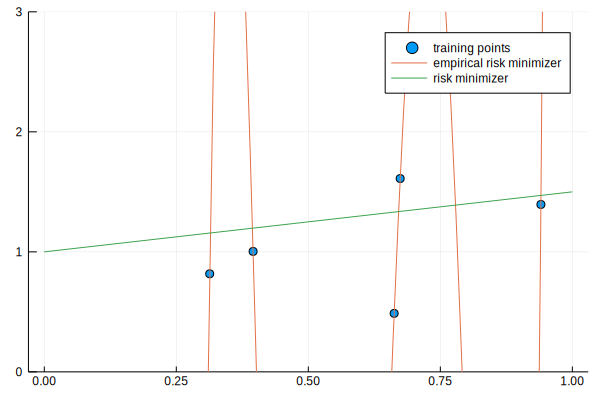

In [3]:
import Pkg; Pkg.add("Polynomials")
using Plots, Polynomials, Random
Random.seed!(123)
X = rand(6)
Y = X/2 .+ 1 .+ randn(6)
p = polyfit(X,Y)
scatter(X, Y, label = "training points", ylims = (0,3))
plot!(0:0.01:1, x->p(x), label = "empirical risk minimizer")
plot!(0:0.01:1, x->x/2+1, label = "risk minimizer") 


This example illustrates a phenomenon called **overfitting**. Although the empirical risk is small for the prediction function $h$ we found, smallness of the empirical risk does not imply smallness of the true risk. The difference between empirical risk and the actual value of the risk functional is called **generalization error** (or *test* error). 

We mitigate overfitting by building [**inductive bias**](gloss:inductive-bias) into the model. Common approaches include 
* using a restrictive class $\mathcal{H}$ of candidate functions, 
* **regularizing**: adding a term to the loss functional which penalizes model complexity, and 
* **cross-validating**: proposing a spectrum of candidate functions and selecting the one which performs best on withheld training observations.

## Problem 4

* Which method of introducing inductive bias does linear regression use? 
* Which method did we use for kernel density estimation in the [statistics course](https://mathigon.org/course/intro-statistics/estimating-joint-densities)? 

Inductive bias can lead to **underfitting**: relevant relations are missed, so both training and test error are larger than necessary. The tension between underfitting and overfitting is the **bias-complexity** (or *bias-variance*) **tradeoff**. 

**Theorem** (no free lunch)  
Suppose $\mathcal{X}$ and $\mathcal{Y}$ are finite sets, and let $f$ denote a probability distribution on $\mathcal{X} \times \mathcal{Y}$. Let $D$ be a collection of $n$ independent observations from $f$, and let $h_1$ and $h_2$ be prediction functions (which associate a prediction $h_j(d,\mathbf{x}) \in \mathcal{Y}$ to each pair $(d,\mathbf{x})$ where $d$ is a set of training observations and $\mathbf{x} \in \mathcal{X}$). Consider the cost random variable $C_j = (h_j(D,X) - Y)^2$ (or $C_j = \boldsymbol{1}_{\{h_j(D,X) - Y\}}$) for $j \in \{1,2\}$. 
  
The average over all distributions $f$ of $C_1$ is equal to the average over all distributions $f$ of $C_2$. 

## Problem 5

The no-free-lunch theorem implies that cross-validation is exactly as effective on average as anti-cross-validation (select the worst-performing model on withheld data). What does that imply about the relationship between real-world probability distributions and the space of all probability distributions?

--- 

## Linear Regression

To estimate $\boldsymbol{\beta} = [\beta_0,\beta_1]$ from the $n$ observations $\{(x_i,y_i)\}_{i=1}^n$, we minimize the empirical mean squared error (also known as the **residual sum of squares**: 

$$
\operatorname{RSS}(\boldsymbol{\beta}) = \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i)^2.   
$$

## Problem 6

Find the value of $\boldsymbol{\beta}$ which minimizes $\operatorname{RSS}(\boldsymbol{\beta})$. 

## Problem 7 

Show how to use linear regression to find the polynomial of degree $d$ which minimizes the residual sum of squares. 

---

## Quadratic Discriminant Analysis

In this section, we'll take a look at a classification problem. 

<img src="flower-points.svg" style="float: right;">

## Problem 8

Given a flower randomly selected from a field, let $X_1$ be its petal width in centimeters, $X_2$ its petal length in centimeters, and $Y\in\{\mathrm{R},\mathrm{G},\mathrm{B}\}$ its color. Let

$$
\begin{align*}
\boldsymbol{\mu}_{\mathrm{R}} &=
\left[\begin{smallmatrix} 9 \\ 5 \end{smallmatrix}\right]
  &\quad \boldsymbol{\mu}_{\mathrm{G}} &=
  \left[\begin{smallmatrix}4 \\ 10 \end{smallmatrix}\right]
    &\quad \boldsymbol{\mu}_{\mathrm{B}} &= \left[\begin{smallmatrix}7 \\ 9 \end{smallmatrix}\right] \\
A_{\mathrm{R}} &= \left[\begin{smallmatrix}1.5 & -1 \\ 0 & \hphantom{-}1
              \\ \end{smallmatrix}\right] &\quad 
A_{\mathrm{G}} &= \left[\begin{smallmatrix}0.5 & 0.25 \\ 0 & 0.5
              \\ \end{smallmatrix}\right] &\quad 
A_{\mathrm{B}} &= \left[\begin{smallmatrix}2 & 0 \\ 0 & 2
              \\ \end{smallmatrix}\right]. 
\end{align*}
$$

Suppose that the joint distribution of $X_1, X_2,$ and $Y$ is defined as follows: for any $A\subset \mathbb{R}^2$ and color $c \in \{\mathrm{R},\mathrm{G},\mathrm{B}\}$, we have

$$
  \mathbb{P}(A \times \{c\}) = p_c\int_{\mathbb{R}^2} f_c(x_1,x_2) \operatorname{d} x_1 
  \operatorname{d} x_2, 
$$

where $(p_R,p_G,p_B) = (1/3,1/6,1/2)$ and $f_c$ is the multivariate normal density with mean $\mu_c$ and covariance matrix $A_cA_c'$. In other words, we can sample from the joint distribution of of $X_1, X_2,$ and $Y$ by sampling $Y$ from {R, G, B} with probabilities 1/3, 1/6, and 1/2, respectively, and then generate $(X_1, X_2)$ by calculating $A_Y Z + \mu_Y$, where $Z$ is a vector of two standard normal random variables which are independent and independent of $Y$. 

Three hundred observations from the distribution of $(X_1, X_2, Y)$ are
shown in the figure

Find the best predictor of $Y$ given $(X_1,X_2) = (x_1, x_2)$ (using the 0-1 loss function), and find a way to estimate that predictor using the given observations.  

In [ ]:
using Plots, Distributions, Random; Random.seed!(1234)
struct Flower
    X::Vector
    color::String
end
# density function for the normal distribution N
xs = 0:1/2^4:15
ys = 0:1/2^4:15
As = [[1.5 -1; 0 1],[1/2 1/4; 0 1/2], [2 0; 0 2]]
μs = [[9,5],[4,10],[7,9]]
Ns = [MvNormal(μ,A*A') for (μ,A) in zip(μs,As)]
p = Weights([1/3,1/6,1/2])
colors = ["red","green","blue"]
function randflower(μs,As)
    i = sample(p)
    Flower(As[i]*randn(2)+μs[i],colors[i])
end
flowers = [randflower(μs,As) for i=1:300]